## Student Performance Indicator



### Life Cycle of ML Project
- understand the problem statement
- data collection
- data checks to Performance
- data pre-processing
- Model Training
- Choose best Model



### Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [69]:
# import required packages
import pandas as pd  # Pandas is a Python library that provides data analysis tools for working with tabular data. and it is used to to analyze, manipulate, and visualize data.

import numpy as np  # numpy is a library used in python for numerical computation like array with 1d ,2d ... nd and it also has some function that is used for working on algebra , matrices etc

import matplotlib.pyplot as plt  # a Python library that allows users to create plots, histograms, bar charts, and other visualizations from data basically it is used for the visualization purposes

import seaborn as sns  # it is also a data visulization libraray which is based on matplotlib. It provide a high-level interface for drawing attractive and informative statistical graphic.

%matplotlib inline  
# it is used to display the plots in the notebook itself rather than in seperate line


import warnings  # The warnings module in Python is used to manage warning messages, allowing you to control whether they appear, are suppressed, or turned into errors.
warnings.filterwarnings("ignore")  # This is used to ignore the warning messages.

### load the dataset

In [70]:
dataset = pd.read_csv('./dataset/StudentsPerformancecopy.csv')
dataset.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
dataset.shape

(1000, 8)

## dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check missing values

In [72]:
dataset.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check Duplicated


In [73]:
dataset.duplicated().sum()

0

#### Check DataType

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check the number of unique values of each column


In [75]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of data set

In [76]:
dataset.describe()
# it show the statistic like count , mean , std , min , max , 25% , 50% , 75%

# 25% - first quartile - the value below which 25% of the data falls
# 50% - medain of the datatset 
# 75% - 3rd or upper quartile - the value below which 75% of the data falls

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


####  Check various categories present in the different categorical column

#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# Expolring Data

In [77]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Categories in all Columns 

In [78]:
print(dataset["gender"].unique())
print(dataset["race/ethnicity"].unique())
print(dataset["parental level of education"].unique())
print(dataset["lunch"].unique())
print(dataset["test preparation course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


##### define numerical and categorical cols

In [79]:
numerical_feature = []
for i in dataset.columns:
    if dataset[i].dtype != "object":
        numerical_feature.append(i)
        
categorical_feature = []
for i in dataset.columns:
    if dataset[i].dtype == "object":
        categorical_feature.append(i)
        
print("total numerical features are {} -- {}".format(len(numerical_feature) ,numerical_feature))
print("total categorical features are {} -- {}".format(len(categorical_feature) ,categorical_feature))

total numerical features are 3 -- ['math score', 'reading score', 'writing score']
total categorical features are 5 -- ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [80]:
dataset.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


### Add cols for total score and avergae

In [81]:
dataset["total score"] = dataset["math score"] + dataset["reading score"] + dataset["writing score"]
dataset["average"] = dataset["total score"]/3
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [82]:
reading_full = dataset[dataset['reading score'] == 100]['average'].count()
writing_full = dataset[dataset['writing score'] == 100]['average'].count()
math_full = dataset[dataset['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [83]:
reading_less_20 = dataset[dataset['reading score'] <= 20]['average'].count()
writing_less_20 = dataset[dataset['writing score'] <= 20]['average'].count()
math_less_20 = dataset[dataset['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

# Data Visulization

###  Exploring Data ( Visualization )
####  Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

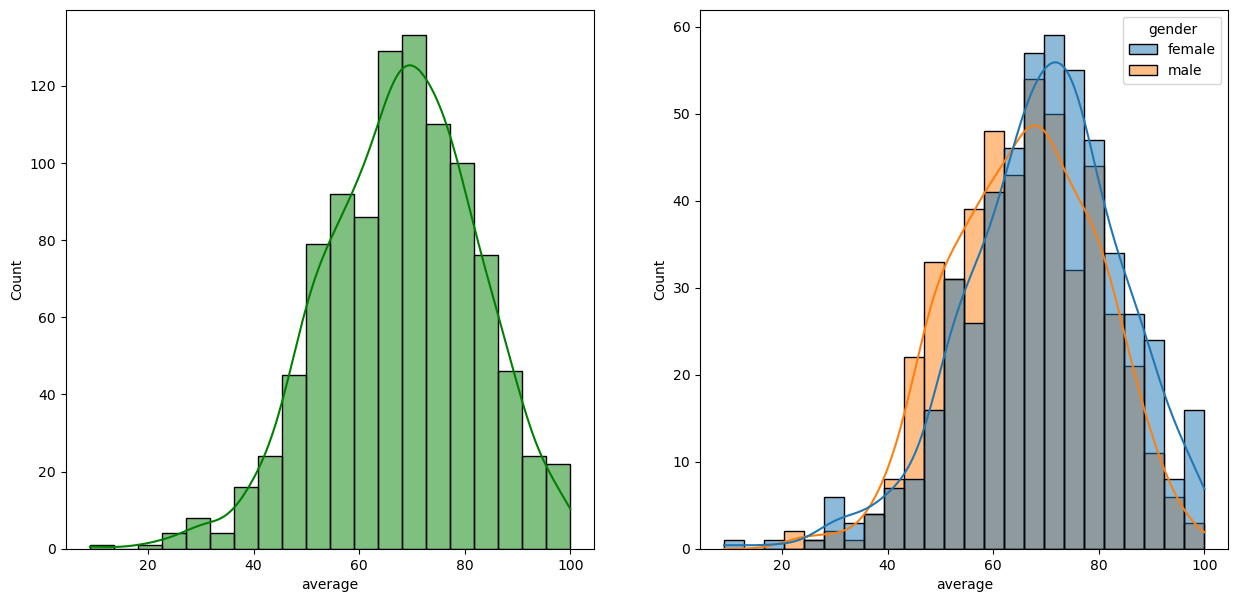

In [84]:
# histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='average',kde=True,hue='gender')
plt.show()

# average overall students and in 2nd plot the distribution is how woth average of male students with average of femail students

# kde = KDE stands for Kernel Density Estimate. It's a method for visualizing the distribution of data in a dataset
# bins - The number of bins (bar groups) to be used. binwidth : The width of each bin
# hue - hue' is used to visualize the data of different categories in one plot.


In [85]:
dataset.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


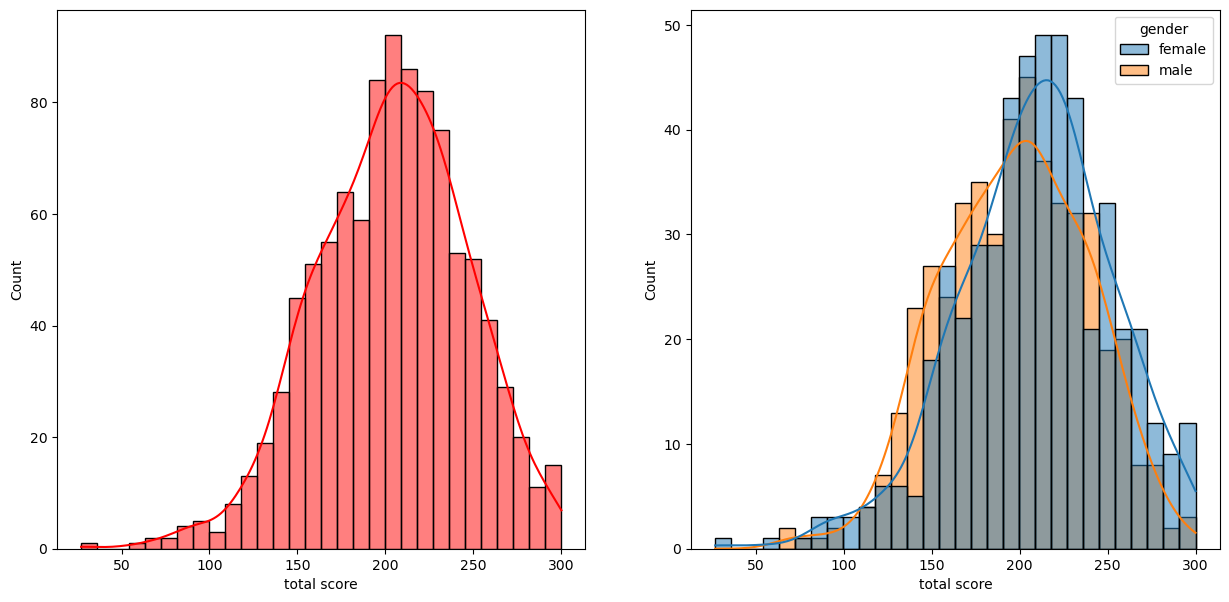

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=dataset,x='total score', bins=30 , kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

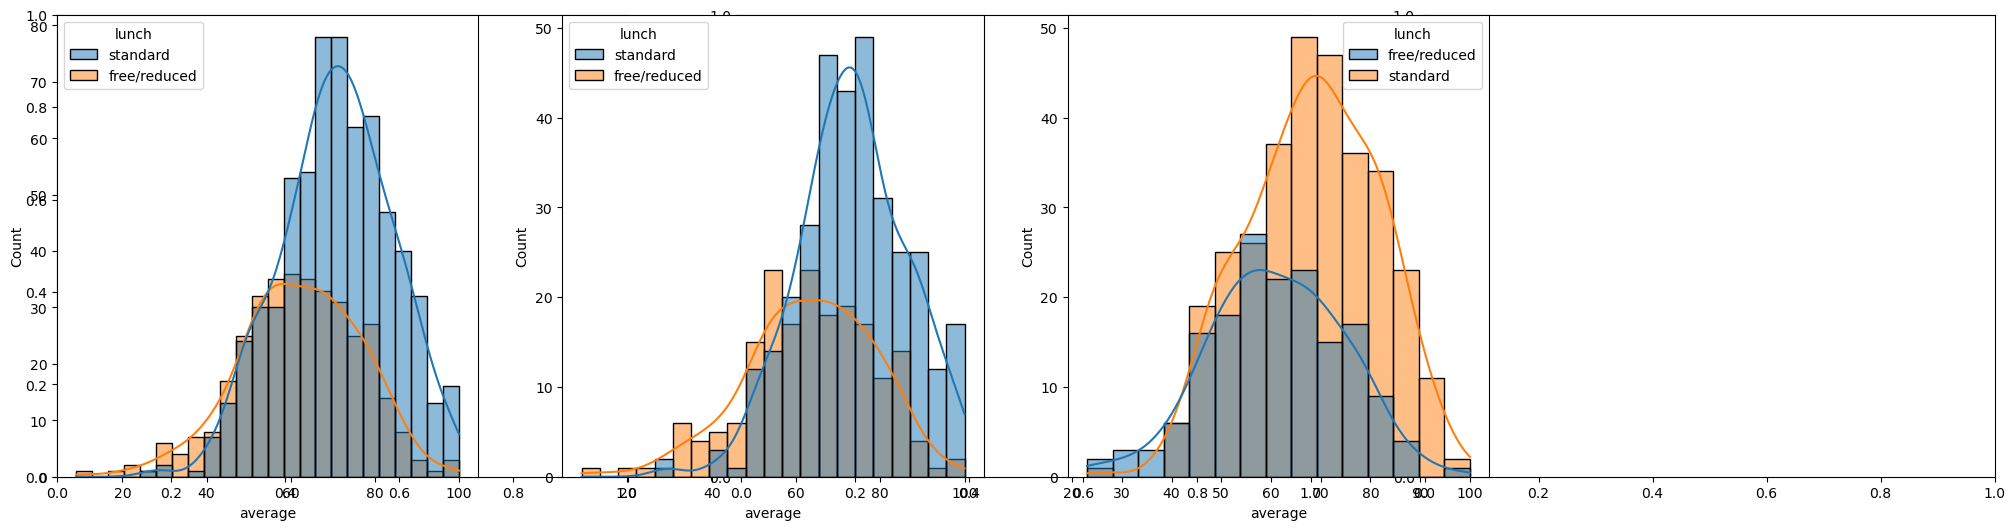

In [87]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dataset,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

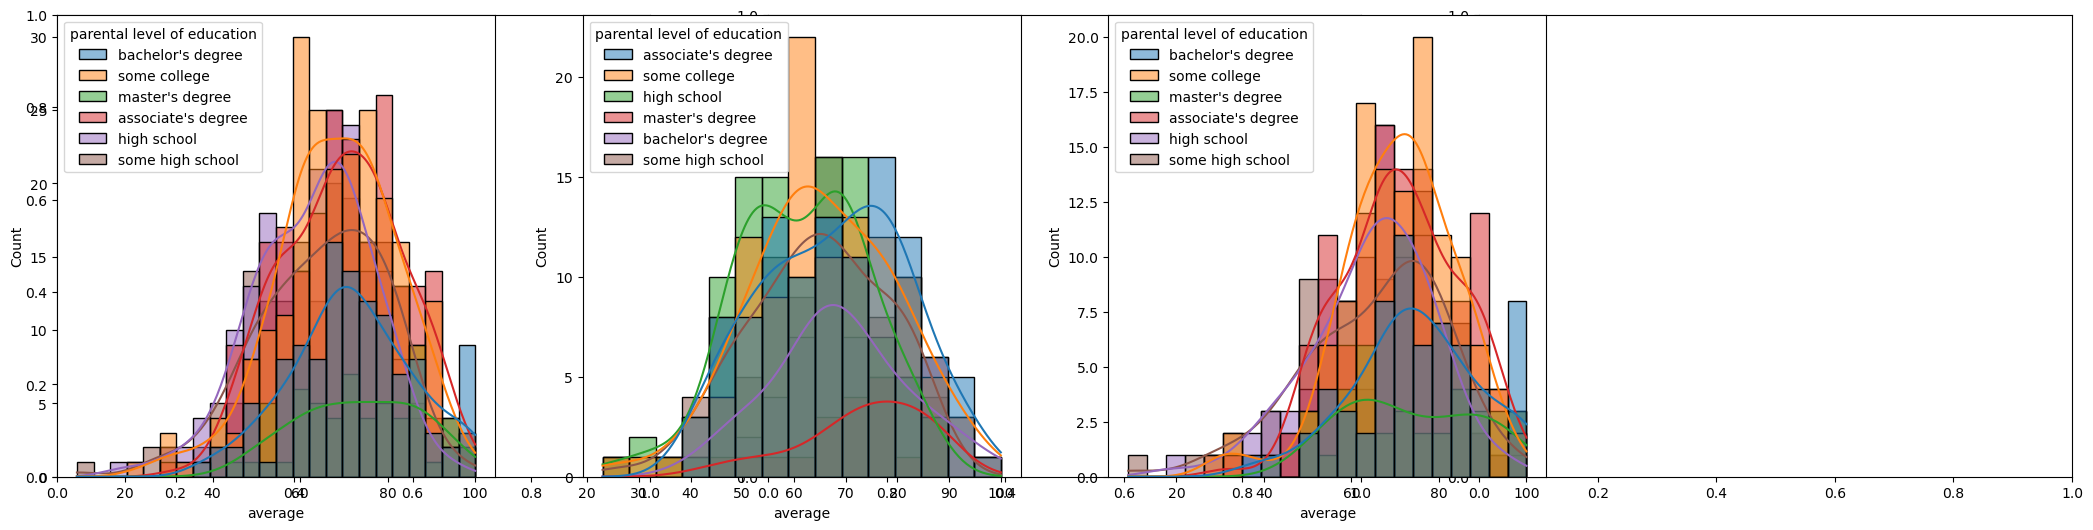

In [88]:
plt.subplots(1,3,figsize=(26,6))

plt.subplot(141)
ax =sns.histplot(data=dataset,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

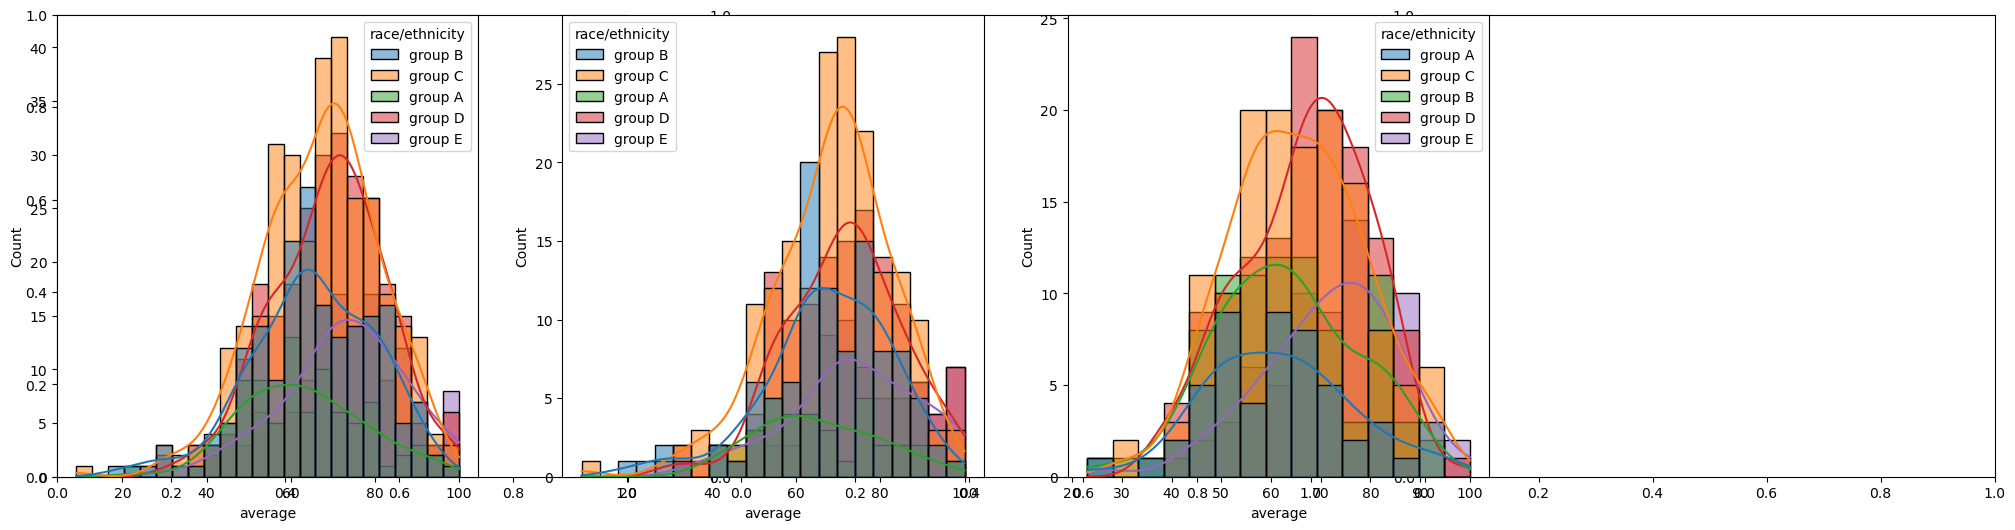

In [89]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


In [90]:
dataset.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


#### Maximumum score of students in all three subjects

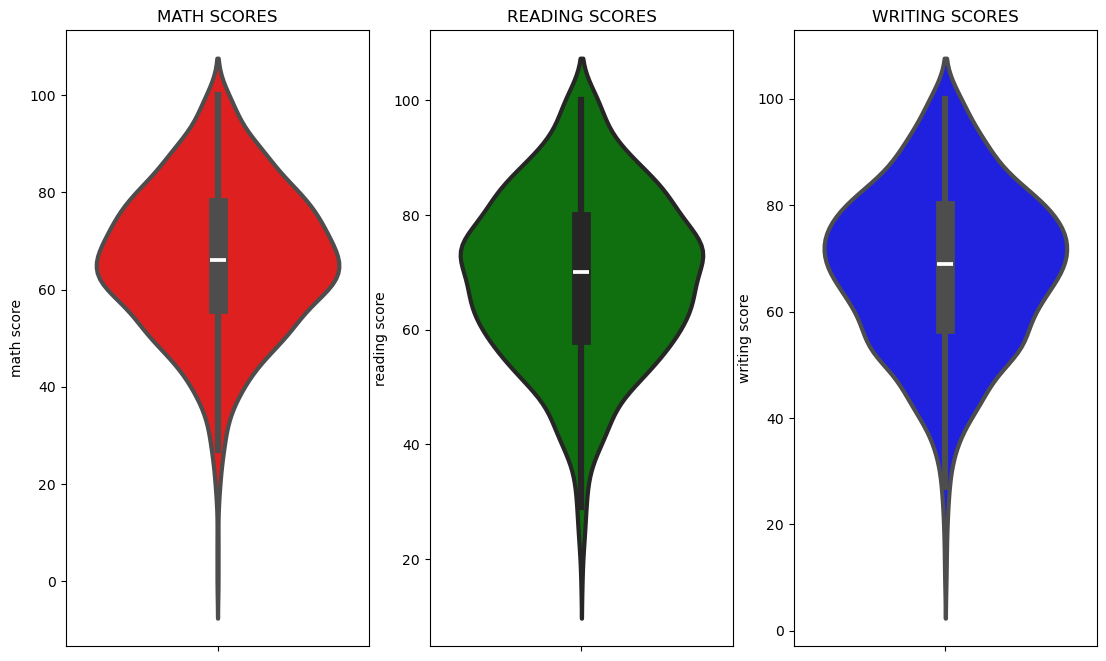

In [91]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=dataset,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=dataset,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=dataset,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

####  Multivariate analysis using pieplot

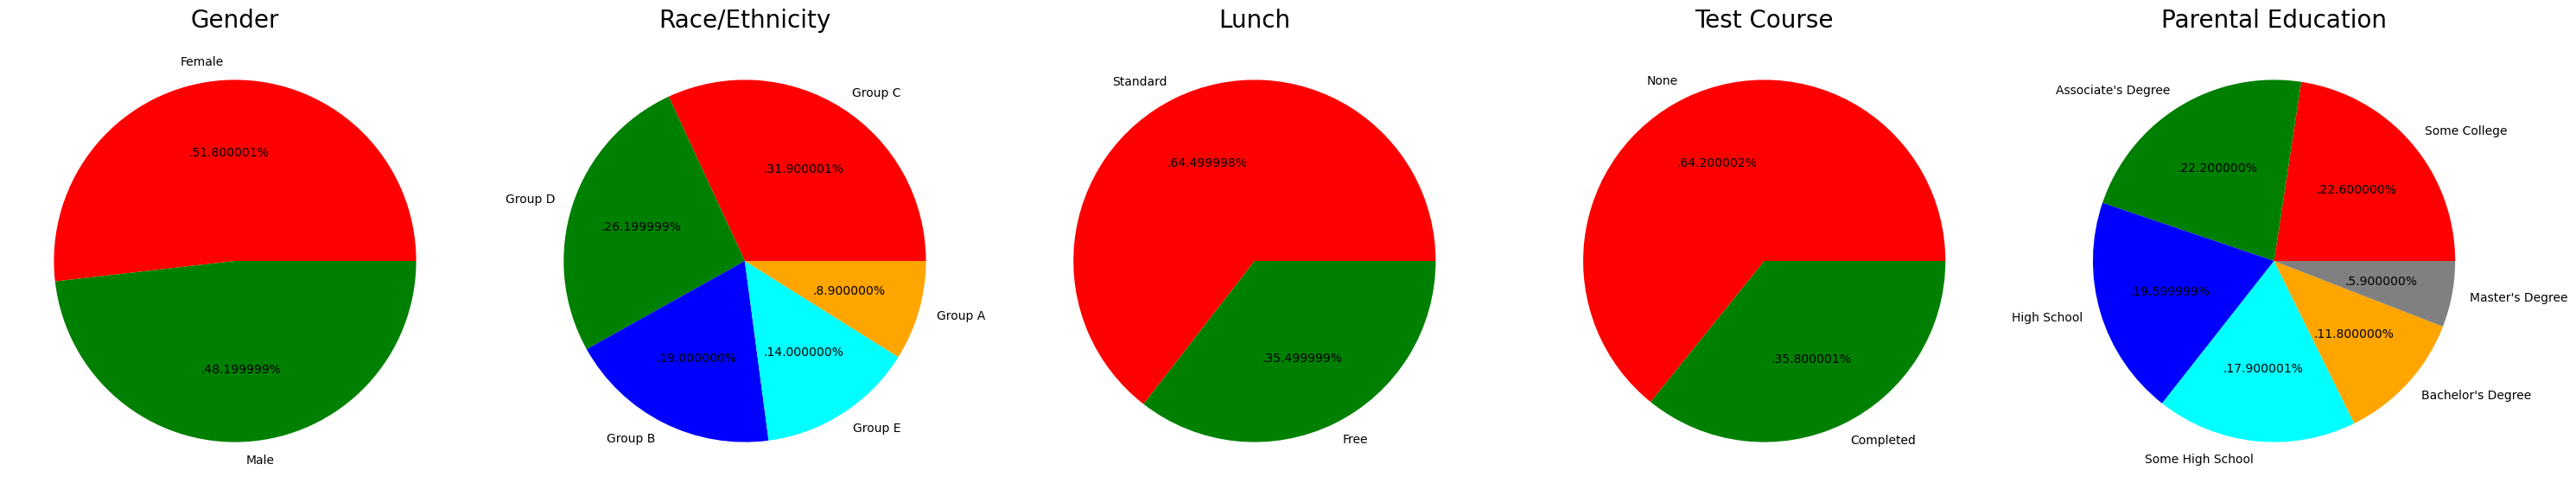

In [92]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dataset['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature Wise Visualization

### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

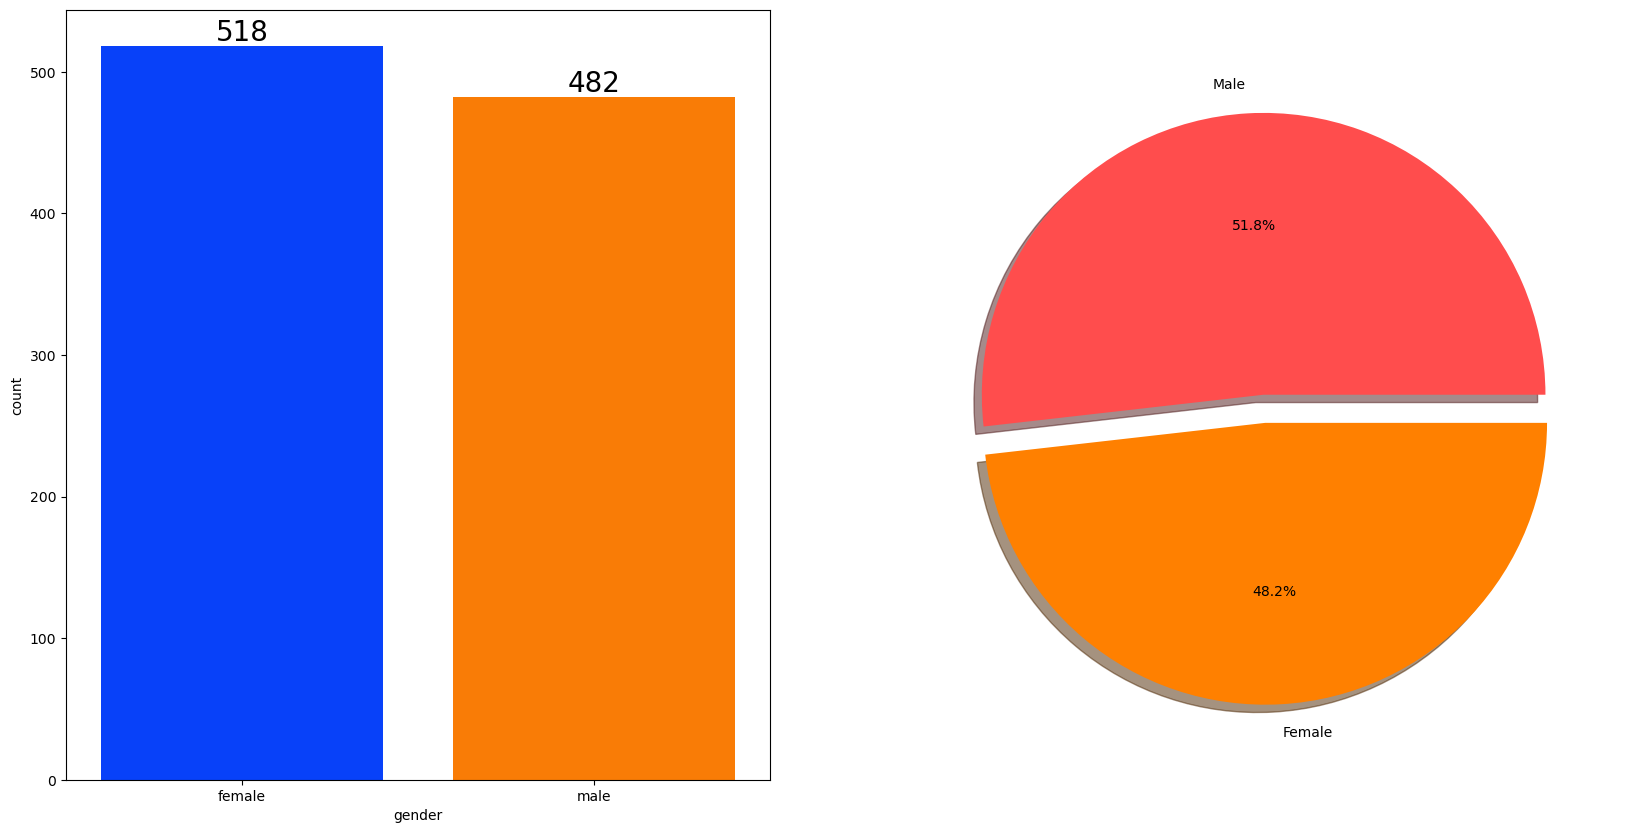

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['gender'],data=dataset,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dataset['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [97]:
gender_group = dataset.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


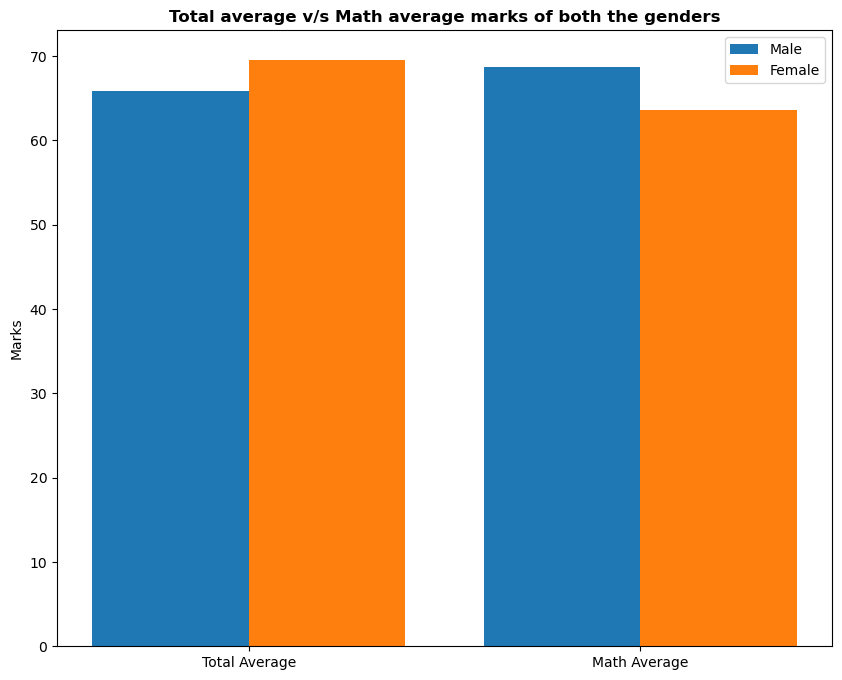

In [99]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

####  PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

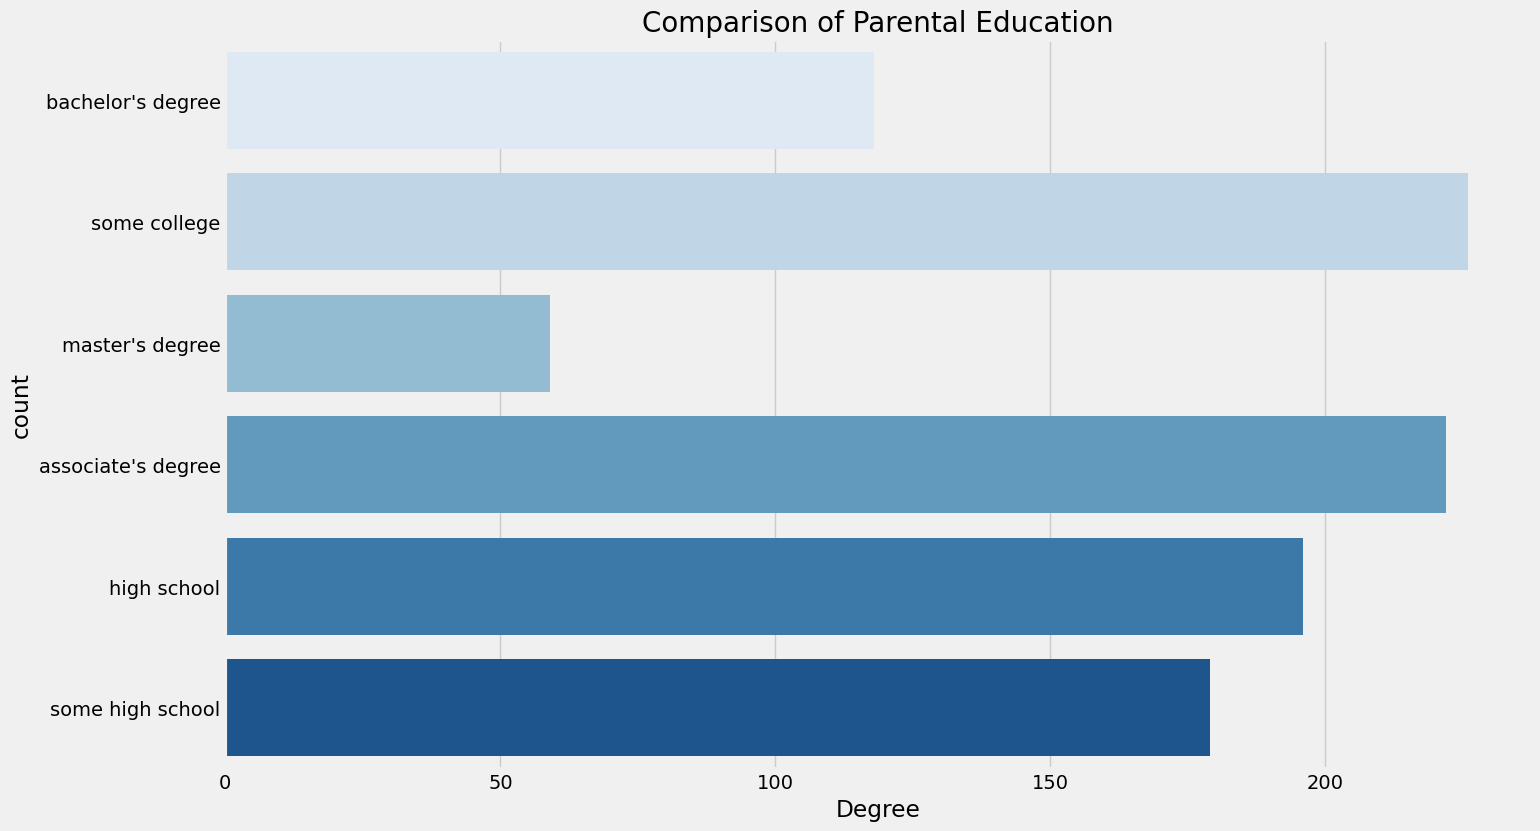

In [100]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(dataset['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

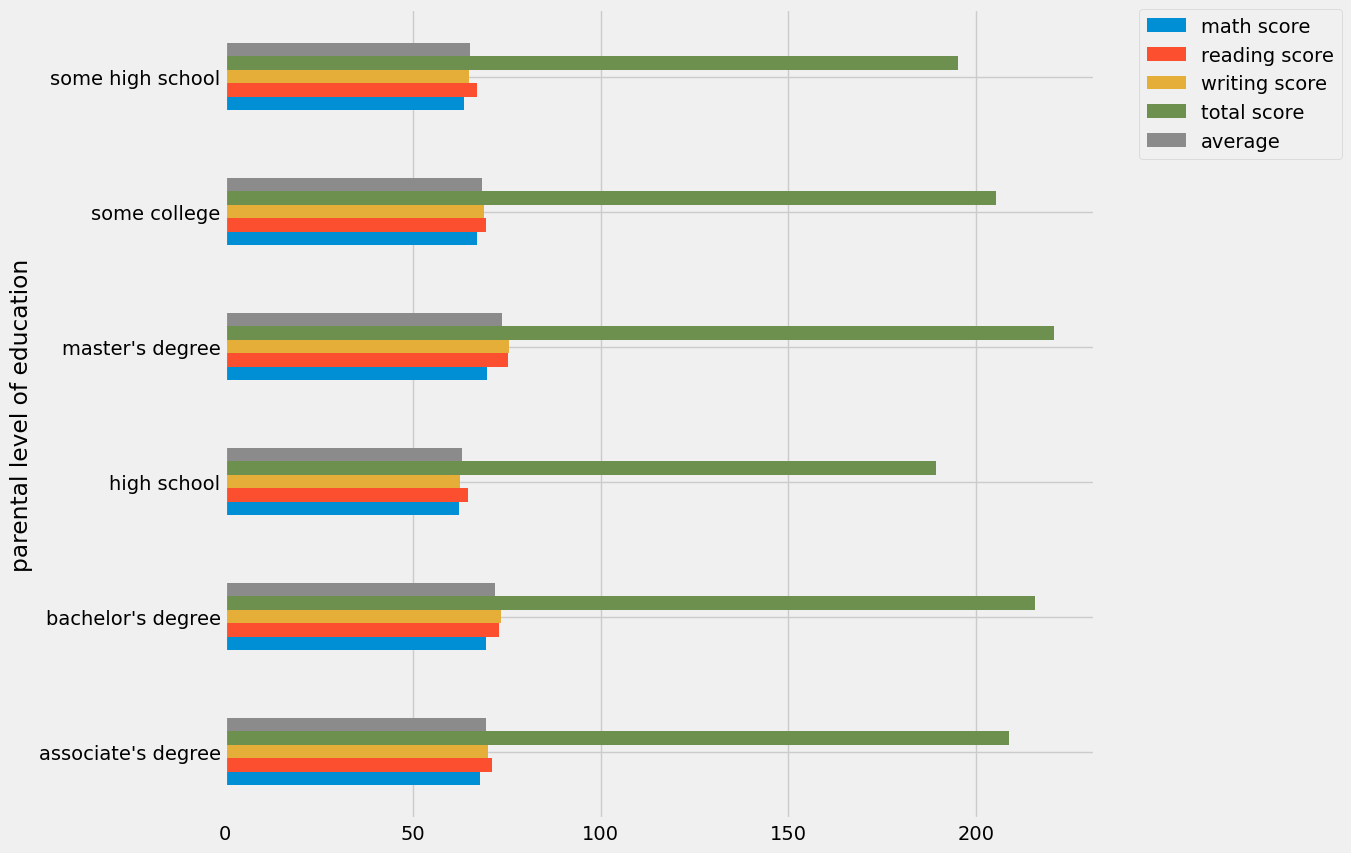

In [103]:
dataset.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

# LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [104]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(dataset['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

OSError: 'seaborn-talk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

#### Insights 
- Students being served Standard lunch was more than free lunch

# BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [105]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=dataset['parental level of education'],data=dataset,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=dataset['parental level of education'],data=dataset,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

####  TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math score'], hue=dataset['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading score'], hue=dataset['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing score'], hue=dataset['test preparation course'])

<Axes: xlabel='lunch', ylabel='writing score'>

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

####  CHECKING OUTLIERS



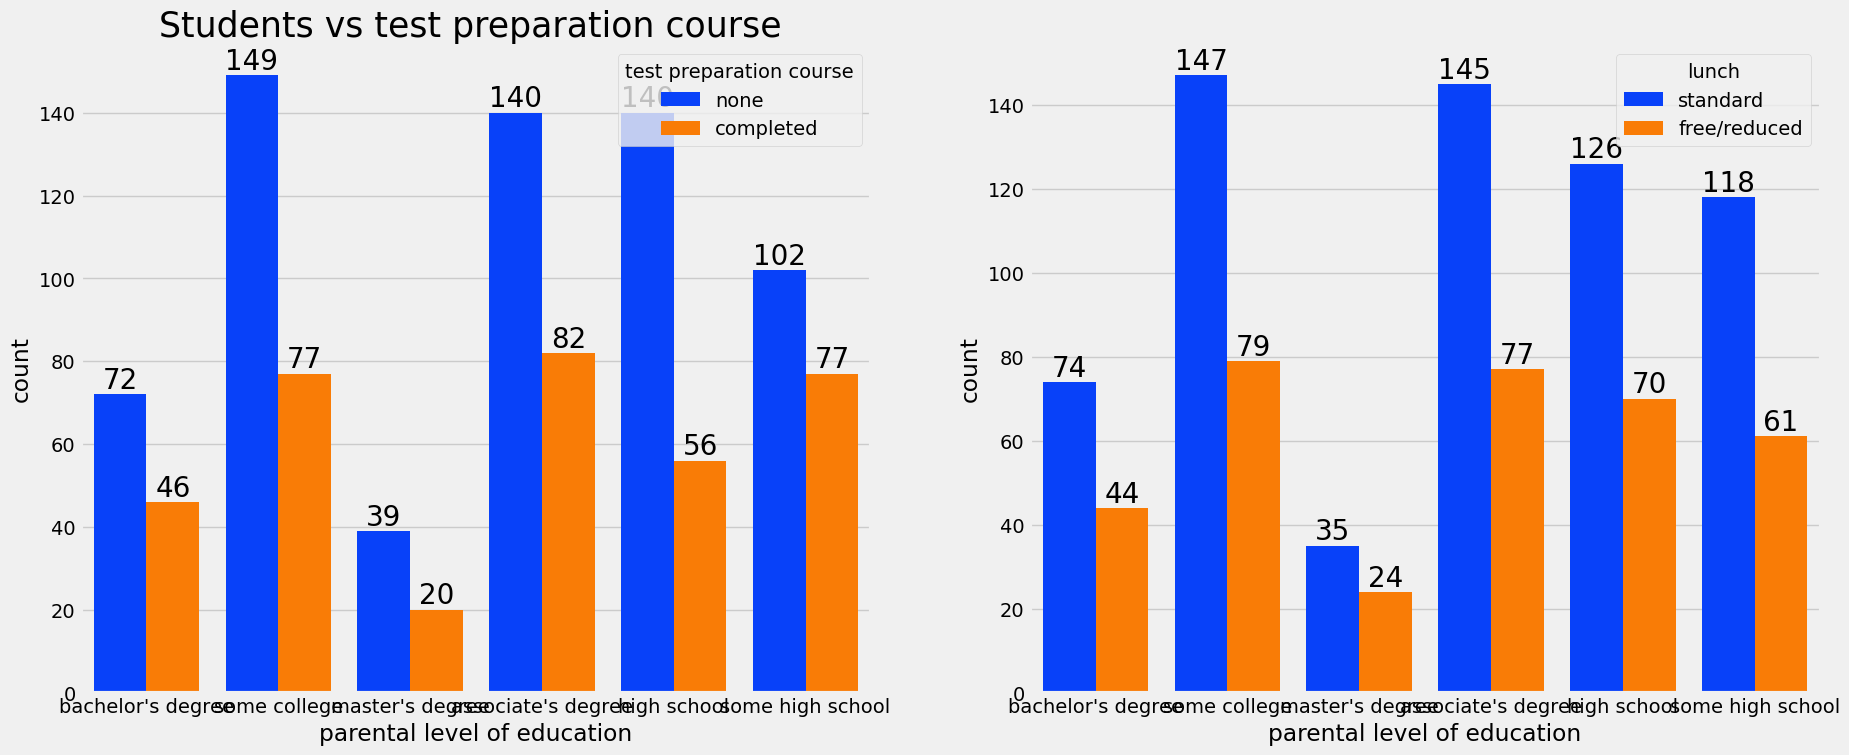

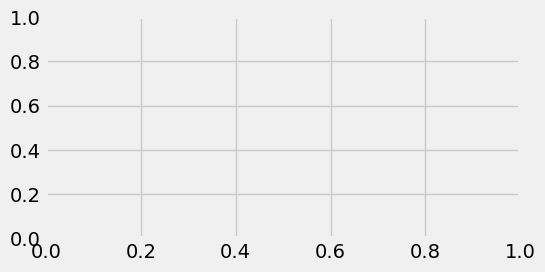

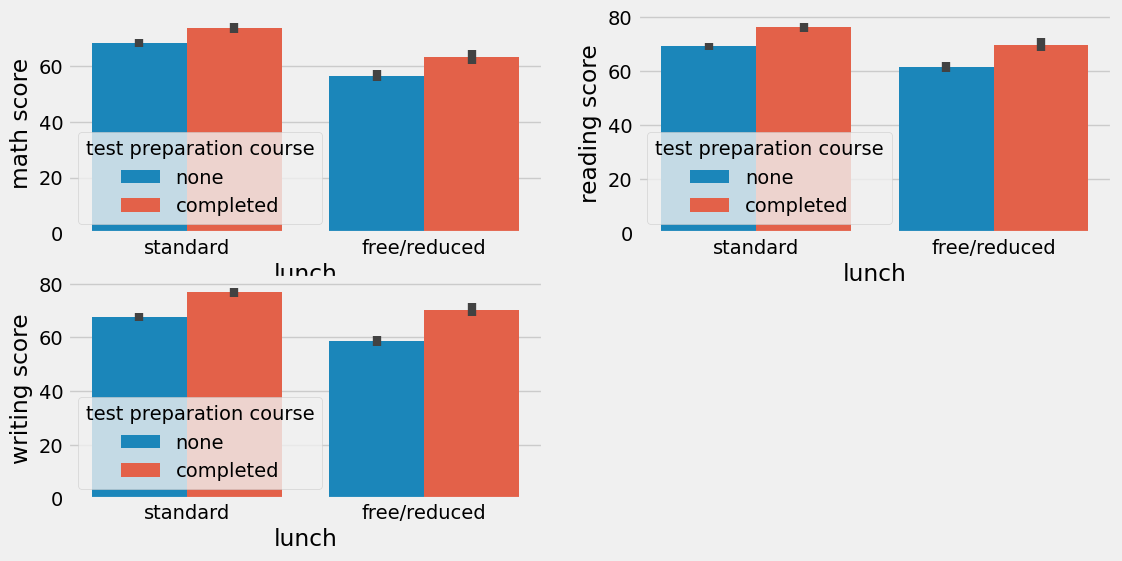

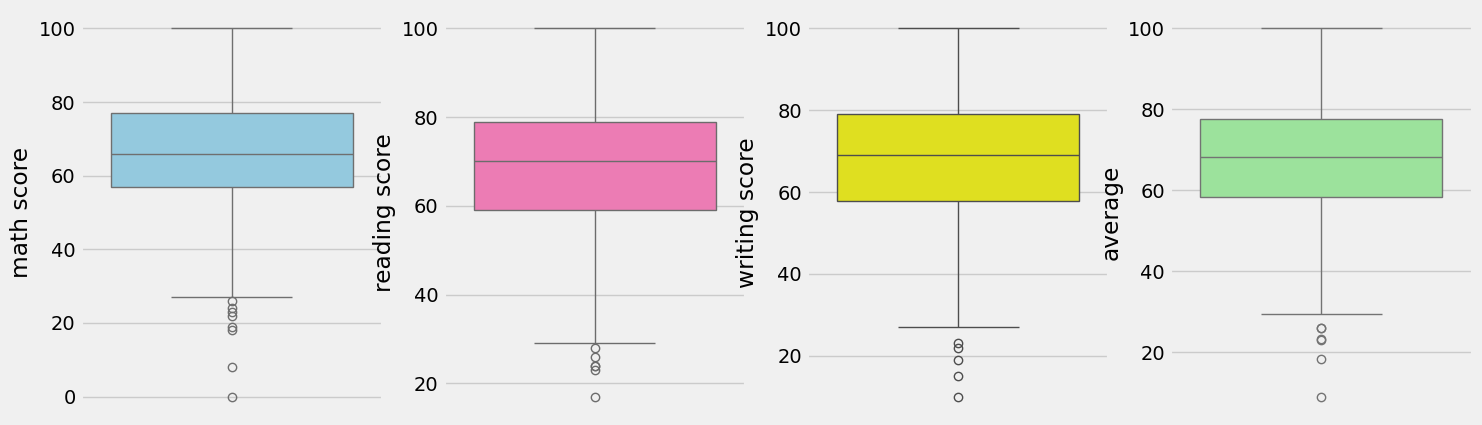

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

####  MUTIVARIATE ANALYSIS USING PAIRPLOT

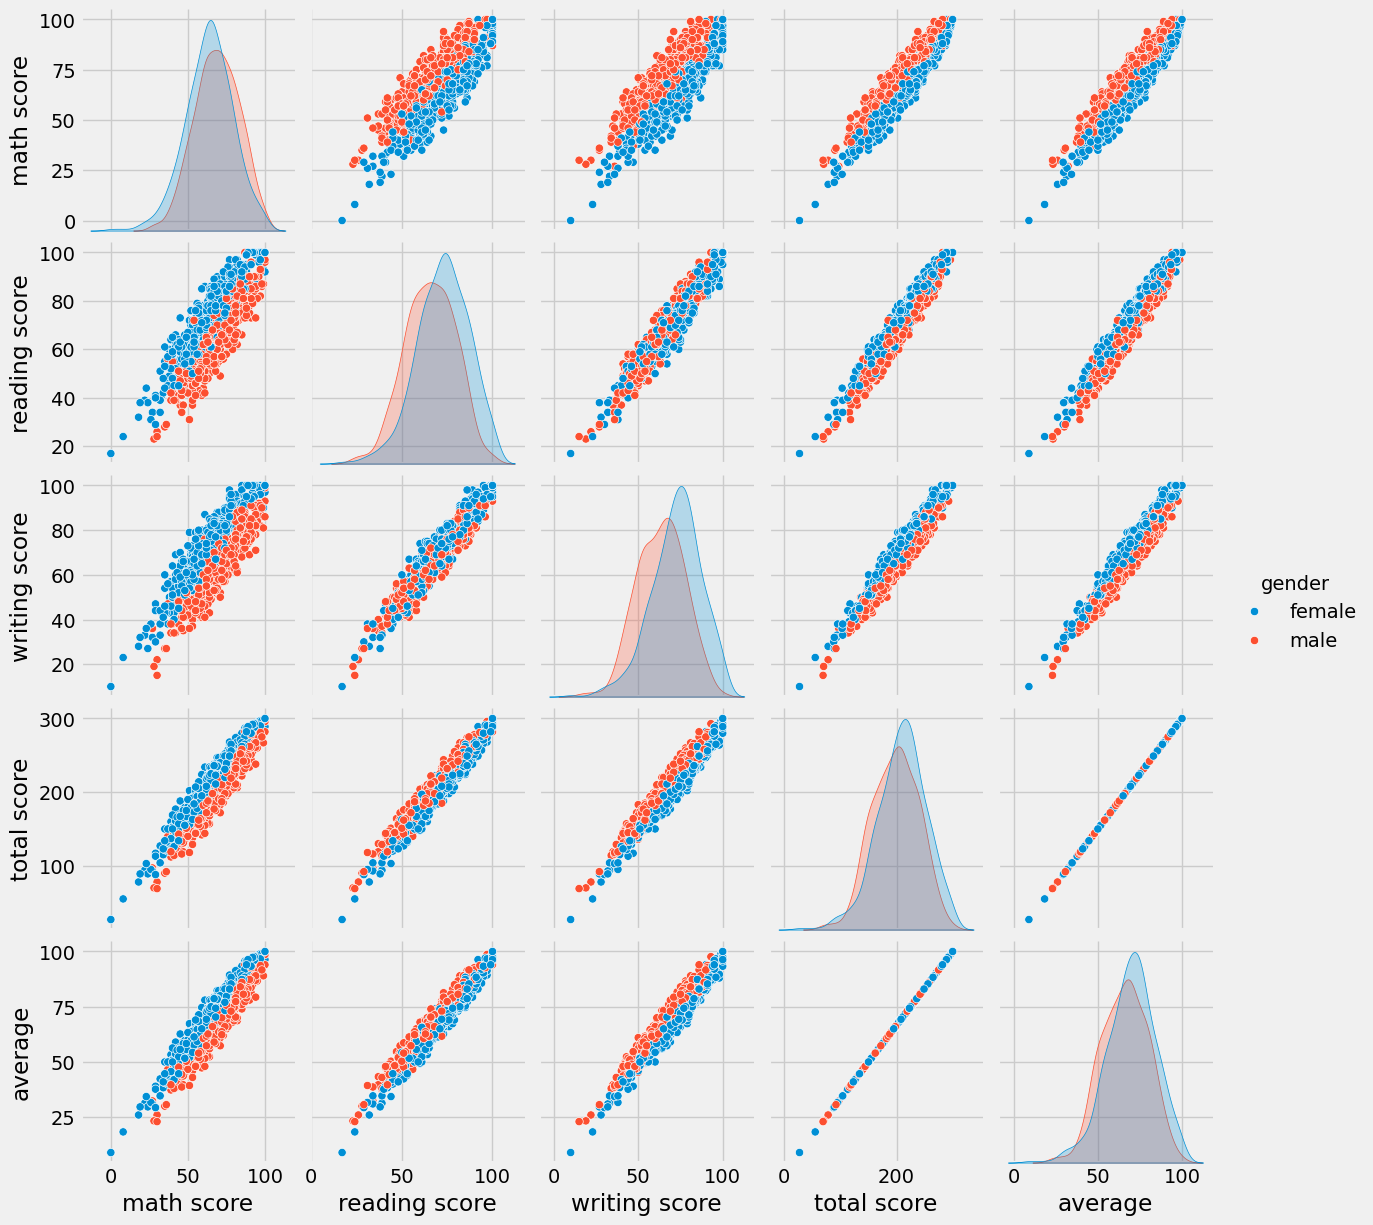

In [113]:
sns.pairplot(dataset,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5 Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.